##**TITANIC: MACHINE LEARNING FROM DISASTER**##

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble, model_selection

READING TRANING AND TESTING DATA FROM CSV FILE

In [2]:
train = pd.read_csv("/content/drive/My Drive/Titanic dataset/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("/content/drive/My Drive/Titanic dataset/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Passengers boarding location')

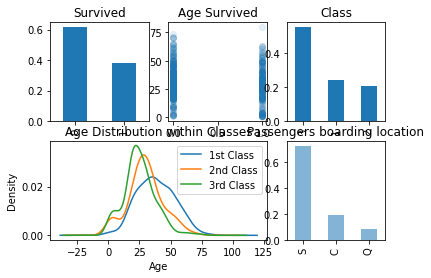

In [4]:
plt.subplot2grid((2,3), (0,0))
train.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

plt.subplot2grid((2,3), (0,1))
plt.scatter(train.Survived, train.Age, alpha=0.1)
plt.title("Age Survived")

plt.subplot2grid((2,3), (0,2))
train.Pclass.value_counts(normalize=True).plot(kind="bar")
plt.title("Class")

plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within Classes")
plt.legend(("1st Class", "2nd Class", "3rd Class"))

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.55)
plt.title("Passengers boarding location")

In [5]:
print(train.shape)

(891, 12)


FEATURE ENGINEERING

In [6]:
def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1

    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

clean_data(train)
clean_data(test)

MODELLING

In [9]:
target = train["Survived"].values
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

In [10]:
forest = ensemble.RandomForestClassifier(
    max_depth = 7,
    min_samples_split = 4,
    n_estimators = 1000,
    random_state = 1,
    n_jobs = -1
)
forest = forest.fit(features_forest, target)

In [11]:
print(forest.feature_importances_)
print(forest.score(features_forest, target))

[0.12765467 0.14461609 0.40192252 0.19655999 0.05586411 0.03997785
 0.03340478]
0.8866442199775533


In [12]:
scores = model_selection.cross_val_score(forest, features_forest, target, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.77777778 0.82022472 0.71910112 0.88764045 0.93258427 0.83146067
 0.82022472 0.78651685 0.87640449 0.83146067]
0.8283395755305868


In [13]:
test_features_forest = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_forest = forest.predict(test_features_forest)

PassengerId = np.array(test["PassengerId"]).astype(int)
solution = pd.DataFrame(prediction_forest, PassengerId, columns = ["Survived"])
solution.to_csv("random_forest.csv", index_label = ["PassengerId"])
print("Your submission was successfully saved!")

Your submission was successfully saved!
